生日问题

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from numba import njit,prange
import numba
numba.config.NUMBA_DEFAULT_NUM_THREADS=4
times=100000
#不加速贼慢
@njit(parallel=True)
def birthday_count(times):
    result=np.zeros(100)
    result1=np.zeros(100)
    for i in prange(1,101):#外层并行最快
        cnt=0
        cnt1=0
        for _ in range(times):
            b=np.random.randint(1,366,size=(i))
            # _, counts = np.unique(b, return_counts=True)#jit不支持
            counts=np.bincount(b)
            if 2 in counts:
                cnt+=1
            if 3 in counts:
                cnt1+=1
        result[i-1]=cnt/times
        result1[i-1]=cnt1/times  
    return result,result1          

result,result1=birthday_count(times)
for i in range(0,len(result)):
    if (i+1)%5==0:
        print(f'{i+1}个人中有%{(result[i]*100):.4f}的概率至少有两个人同一天生日')
        print(f'{i+1}个人中有%{(result1[i]*100):.4f}的概率至少有三个人同一天生日')

5个人中有%2.7060的概率至少有两个人同一天生日
5个人中有%0.0100的概率至少有三个人同一天生日
10个人中有%11.6920的概率至少有两个人同一天生日
10个人中有%0.0900的概率至少有三个人同一天生日
15个人中有%25.0300的概率至少有两个人同一天生日
15个人中有%0.3160的概率至少有三个人同一天生日
20个人中有%40.4330的概率至少有两个人同一天生日
20个人中有%0.7890的概率至少有三个人同一天生日
25个人中有%55.9290的概率至少有两个人同一天生日
25个人中有%1.5700的概率至少有三个人同一天生日
30个人中有%69.8150的概率至少有两个人同一天生日
30个人中有%2.7560的概率至少有三个人同一天生日
35个人中有%80.5390的概率至少有两个人同一天生日
35个人中有%4.3190的概率至少有三个人同一天生日
40个人中有%88.1660的概率至少有两个人同一天生日
40个人中有%6.5620的概率至少有三个人同一天生日
45个人中有%93.3160的概率至少有两个人同一天生日
45个人中有%9.2360的概率至少有三个人同一天生日
50个人中有%96.4130的概率至少有两个人同一天生日
50个人中有%12.3800的概率至少有三个人同一天生日
55个人中有%98.1460的概率至少有两个人同一天生日
55个人中有%15.7810的概率至少有三个人同一天生日
60个人中有%99.1470的概率至少有两个人同一天生日
60个人中有%19.9420的概率至少有三个人同一天生日
65个人中有%99.6000的概率至少有两个人同一天生日
65个人中有%24.3450的概率至少有三个人同一天生日
70个人中有%99.8400的概率至少有两个人同一天生日
70个人中有%29.6640的概率至少有三个人同一天生日
75个人中有%99.9290的概率至少有两个人同一天生日
75个人中有%34.5810的概率至少有三个人同一天生日
80个人中有%99.9710的概率至少有两个人同一天生日
80个人中有%40.0610的概率至少有三个人同一天生日
85个人中有%99.9930的概率至少有两个人同一天生日
85个人中有%45.7310的概率至少有三个人同一天生日
90个人中有%99.9980的概率至少有两个人同一天

Text(0.5, 1.0, 'At least k people have the same birthday')

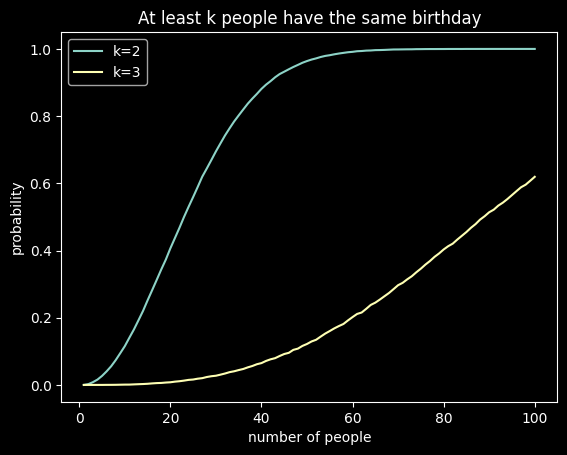

In [4]:

plt.plot(np.arange(1,101),result,label='k=2')
plt.plot(np.arange(1,101),result1,label='k=3')
plt.legend()
plt.xlabel('number of people')
plt.ylabel('probability')
plt.title('At least k people have the same birthday')


In [39]:
father1=np.arange(0,46).reshape(23,2)
father2=np.arange(46,46+46).reshape(23,2)
mother=np.arange(46+46,46+46+46).reshape(23,2)
@njit
def generate(father,mother):
    son=np.zeros((23,2))
    for i in range(23):
        son[i][0]=np.random.choice(father[i])
        son[i][1]=np.random.choice(mother[i])
    return son

times=100000
@njit
def gene_count(times):
    sum=0
    sum1=0
    cnt2=0
    for _ in range(times):
        cnt=0
        cnt1=0
        #son1是son3哥哥，son2是son1表哥，mother是同卵双胞胎
        son1=generate(father1,mother)
        son2=generate(father2,mother)
        son3=generate(father1,mother)
        for i in range(23):
            for j in range(2):
                if son1[i][j]==son2[i][j]:
                    cnt+=1
                if son1[i][j]==son3[i][j]:
                    cnt1+=1
        sum+=cnt
        sum1+=cnt1
        if cnt>cnt1:#和表哥的相同基因更多
            cnt2+=1
        
    return sum/times,sum1/times,cnt2/times

count1,count2,p=gene_count(times)
print(count1,count2,p)#表兄弟的相同染色体条数，亲兄弟的相同染色体条数，和表兄弟更亲的概率


11.50361 23.00721 0.00187
